In [1]:
import numpy as np
import time
import threading
import psutil
import matplotlib.pyplot as plt


#1 Ускорение преобразования Фурье

а) Необходимо написать программу, выполняющую преобразование Фурье над случайно последовательностью из 4096 чисел (воспользуйтесь модулем fft из библиотеки numpy https://numpy.org/doc/stable/reference/routines.fft.html), замерить время исполнения программы.  
б) Напишите программу, последовательно выполняющую операцию Фурье-преобразования над двумя случайными последовательностями из 4096 чисел, замерьте время выполнения.  
в) Напишите программу, которая выполняет Фурье-преобразования над двумя последовательностями из 4096 случаных числе, но при этом каждая последовательность должна обрабатываться в отдельных потоках (воспользуйтесь библиотекой threading https://docs.python.org/3/library/threading.html), замерьте время исполнения каждого потока отдельно и всей программы.  
г) Сравните значения замеров времени из пунктов 1.1, 1.2 и 1.3 и объясните полученные результаты.


In [2]:
# Пункт а

def clockFFT1():
    # Генерация случайной последовательности из 4096 чисел
    sequence = np.random.random(4096)

    # Замер времени начала выполнения преобразования Фурье
    start_time = time.time()

    # Выполнение преобразования Фурье
    fft_result = np.fft.fft(sequence)

    # Замер времени окончания выполнения преобразования Фурье
    end_time = time.time()

    # Вычисление времени исполнения
    execution_time = end_time - start_time

    # Вывод результатов
    print(f"Время исполнения преобразования Фурье: {execution_time:.6f} секунд")
    print("Результат преобразования Фурье:")
    print(fft_result)

clockFFT1()

Время исполнения преобразования Фурье: 0.000776 секунд
Результат преобразования Фурье:
[2028.8025158  +0.j            2.91018099+12.65150225j
  -26.18761238 +8.79040872j ...    5.64381681 +4.32402663j
  -26.18761238 -8.79040872j    2.91018099-12.65150225j]


In [3]:
# Пункт б

def clockFFT2():
    # Генерация двух случайных последовательностей из 4096 чисел
    sequence1 = np.random.random(4096)
    sequence2 = np.random.random(4096)

    # Замер времени начала выполнения преобразований Фурье
    start_time = time.time()

    # Выполнение преобразования Фурье над первой последовательностью
    fft_result1 = np.fft.fft(sequence1)

    # Выполнение преобразования Фурье над второй последовательностью
    fft_result2 = np.fft.fft(sequence2)

    # Замер времени окончания выполнения преобразований Фурье
    end_time = time.time()

    # Вычисление времени исполнения
    execution_time = end_time - start_time

    # Вывод результатов
    print(f"Время исполнения преобразований Фурье: {execution_time:.6f} секунд")
    print("Результат преобразования Фурье для первой последовательности:")
    print(fft_result1)
    print("Результат преобразования Фурье для второй последовательности:")
    print(fft_result2)

clockFFT2()

Время исполнения преобразований Фурье: 0.000283 секунд
Результат преобразования Фурье для первой последовательности:
[2001.01086288 +0.j          -20.6576544  -6.72800708j
  -12.72669946-10.69939103j ...  -12.57040273+12.87295827j
  -12.72669946+10.69939103j  -20.6576544  +6.72800708j]
Результат преобразования Фурье для второй последовательности:
[ 2.03716050e+03 +0.j          2.60250149e-01-28.13990248j
 -1.76254933e+01 -9.30309695j ... -8.79343110e+00+18.38097875j
 -1.76254933e+01 +9.30309695j  2.60250149e-01+28.13990248j]


In [4]:
# Пункт в

def fft_thread(sequence, thread_name):
    start_time = time.time()
    fft_result = np.fft.fft(sequence)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Время исполнения преобразования Фурье в потоке {thread_name}: {execution_time:.6f} секунд")
    return fft_result

def clockFFT3():
    # Генерация двух случайных последовательностей из 4096 чисел
    sequence1 = np.random.random(4096)
    sequence2 = np.random.random(4096)

    # Замер времени начала выполнения всей программы
    start_time_total = time.time()

    # Создание и запуск потоков
    thread1 = threading.Thread(target=fft_thread, args=(sequence1, "Thread 1"))
    thread2 = threading.Thread(target=fft_thread, args=(sequence2, "Thread 2"))

    thread1.start()
    thread2.start()

    # Ожидание завершения потоков
    thread1.join()
    thread2.join()

    # Замер времени окончания выполнения всей программы
    end_time_total = time.time()

    # Вычисление времени исполнения всей программы
    execution_time_total = end_time_total - start_time_total

    # Вывод результатов
    print(f"Общее время исполнения программы: {execution_time_total:.6f} секунд")

clockFFT3()

Время исполнения преобразования Фурье в потоке Thread 2: 0.000317 секундВремя исполнения преобразования Фурье в потоке Thread 1: 0.000815 секунд

Общее время исполнения программы: 0.004133 секунд


Наиболее быстрым оказался вариант а, так как он осуществлял обработку всего одной последовательности. При выполнении преобразования Фурье над двумя последовательностями наиболее быстрым оказался вариант б.

# 2. Ускорение ожидания преобразования Фурье

2.1. Напишите программу, которая выполняет преобразование Фурье последовательности из 4096 случайных чисел а затем синхронно “зависает” на 2 с (используйте функцию sleep). Замерьте время исполнения программы.  
2.2. Напишите программу, которая в одном потоке запускает преобразование Фурье и ожидание (как в п. 2.1), а во втором потоке запускает преобразование Фурье другой случайной последовательност из 4096 чисел без ожидания. Замерьте время исполнения каждого потока отельно и всей программы в целом.  
2.3. Сравните значения замеров времени, полеченные в п. 2.1, 2.2 и 1(в), и объясните полученные результаты

In [5]:
# 2.1

def fft_and_sleep(sequence):
    start_time = time.time()

    # Выполнение преобразования Фурье
    fft_result = np.fft.fft(sequence)

    # Синхронное "зависание" на 2 секунды
    time.sleep(2)

    end_time = time.time()
    execution_time = end_time - start_time

    print(f"Время исполнения программы: {execution_time:.6f} секунд")
    return fft_result

def clockFFT4():
    # Генерация случайной последовательности из 4096 чисел
    sequence = np.random.random(4096)

    # Запуск функции fft_and_sleep в основном потоке
    fft_and_sleep(sequence)

clockFFT4()

Время исполнения программы: 2.002812 секунд


In [6]:
# 2.2

def fft_and_sleep(sequence, thread_name):
    start_time = time.time()

    # Выполнение преобразования Фурье
    fft_result = np.fft.fft(sequence)

    # Синхронное "зависание" на 2 секунды
    time.sleep(2)

    end_time = time.time()
    execution_time = end_time - start_time

    print(f"Время исполнения программы в потоке {thread_name}: {execution_time:.6f} секунд")
    return fft_result

def fft_no_sleep(sequence, thread_name):
    start_time = time.time()

    # Выполнение преобразования Фурье
    fft_result = np.fft.fft(sequence)

    end_time = time.time()
    execution_time = end_time - start_time

    print(f"Время исполнения программы в потоке {thread_name}: {execution_time:.6f} секунд")
    return fft_result

def clockFFT5():
    # Генерация двух случайных последовательностей из 4096 чисел
    sequence1 = np.random.random(4096)
    sequence2 = np.random.random(4096)

    # Замер времени начала выполнения всей программы
    start_time_total = time.time()

    # Создание и запуск потоков
    thread1 = threading.Thread(target=fft_and_sleep, args=(sequence1, "Thread 1"))
    thread2 = threading.Thread(target=fft_no_sleep, args=(sequence2, "Thread 2"))

    thread1.start()
    thread2.start()

    # Ожидание завершения потоков
    thread1.join()
    thread2.join()

    # Замер времени окончания выполнения всей программы
    end_time_total = time.time()

    # Вычисление времени исполнения всей программы
    execution_time_total = end_time_total - start_time_total

    # Вывод результатов
    print(f"Общее время исполнения программы: {execution_time_total:.6f} секунд")

clockFFT5()

Время исполнения программы в потоке Thread 2: 0.000465 секунд
Время исполнения программы в потоке Thread 1: 2.002710 секунд
Общее время исполнения программы: 2.005439 секунд


2.3.

Время выполнения пункта 1 - 2.002812 с, считая 2 секунды сна (sleep).
Время выполнения пункта 2: от начала до конца - 2.005439 с, считая 2 секунды сна (sleep). Время выполнения первого потока - 0.000465 с, время выполнения второго потока - 2.005439 с.
Таким образом, из-за использования функции sleep время ожидания при выполнении программы существенно возрастает, хотя фундаментально расчёт остаётся идентичным. При разделении на потоки скорость выполнения увеличилась.

# 3. Исследование объема используемой динамической памяти.

3.1. Напишите программу, которая создает пустой объект класса list а затем в цикле заполняет данный список числами от 1 до 4096.

3.2. После каждого добавления нового элемента в список добавьте замер используемой процессом памяти (используйте psutil https://psutil.readthedocs.io/en/latest/index.html).

3.3. Постройте зависимость используемой памяти от номера итерации цикла, объясните полученный результат.  

3.4. Повторите пункты 3.1, 3.2 и 3.3 для структуры данных dict (ключи и значения – случайные числа)

In [11]:
# 3.1

def listik():
    # Создание пустого списка
    my_list = []

    # Заполнение списка числами от 1 до 4096
    for i in range(1, 4097):
        my_list.append(i)

    # Вывод заполненного списка
    print("Заполненный список:")
    print(my_list)

listik()

Заполненный список:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 21

In [12]:
# 3.2

import psutil
import os

# Создание пустого списка
numbers = []

# Получаение текущего процесса
process = psutil.Process(os.getpid())

# Заполнение списка числами от 1 до 4096
for i in range(1, 4097):
    numbers.append(i)

    # Получение использованной памяти
    memory_info = process.memory_info()
    print(f"Добавлено число: {i}, Используемая память: {memory_info.rss / (1024 * 1024):.2f} МБ")

# Вывод итогового списка
print("Итоговый список:", numbers)


Добавлено число: 1, Используемая память: 119.80 МБ
Добавлено число: 2, Используемая память: 119.80 МБ
Добавлено число: 3, Используемая память: 119.80 МБ
Добавлено число: 4, Используемая память: 119.80 МБ
Добавлено число: 5, Используемая память: 119.80 МБ
Добавлено число: 6, Используемая память: 119.80 МБ
Добавлено число: 7, Используемая память: 119.80 МБ
Добавлено число: 8, Используемая память: 119.80 МБ
Добавлено число: 9, Используемая память: 119.80 МБ
Добавлено число: 10, Используемая память: 119.80 МБ
Добавлено число: 11, Используемая память: 119.80 МБ
Добавлено число: 12, Используемая память: 119.80 МБ
Добавлено число: 13, Используемая память: 119.80 МБ
Добавлено число: 14, Используемая память: 119.80 МБ
Добавлено число: 15, Используемая память: 119.80 МБ
Добавлено число: 16, Используемая память: 119.80 МБ
Добавлено число: 17, Используемая память: 119.80 МБ
Добавлено число: 18, Используемая память: 119.80 МБ
Добавлено число: 19, Используемая память: 119.80 МБ
Добавлено число: 20, 

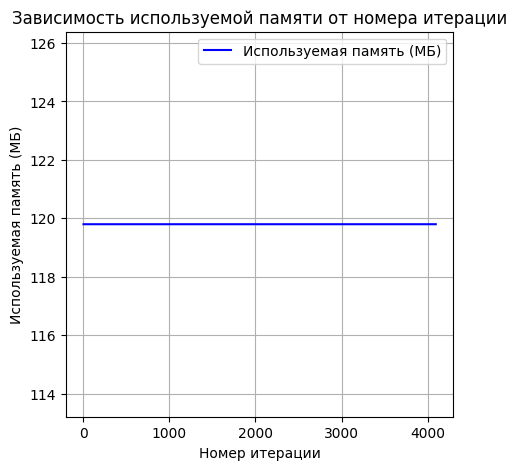

In [10]:
# 3.4

import psutil
import os
import matplotlib.pyplot as plt

# Создание пустого списка
numbers = []

# Получение текущего процесса
process = psutil.Process(os.getpid())

# Список для хранения использованной памяти
memory_usage1 = []

# Заполнение списка числами от 1 до 4096
for i in range(1, 4097):
    numbers.append(i)

    # Получение использованной памяти
    memory_info1 = process.memory_info()
    memory_usage1.append(memory_info1.rss / (1024 * 1024))  # В мегабайтах

# Построение графика зависимости памяти от номера итерации
plt.figure(figsize=(5, 5))
plt.plot(range(1, 4097), memory_usage1, label='Используемая память (МБ)', color='blue')
plt.title('Зависимость используемой памяти от номера итерации')
plt.xlabel('Номер итерации')
plt.ylabel('Используемая память (МБ)')
plt.grid()
plt.legend()
plt.show()

В ходе выполнения задачи затрачивается некоторое количество памяти: если до заполнения list программа требовала 119.80 МБ памяти, то по окончании работы она заняла 120.31 МБ МБ, т.е. зависимость линейная. После перезапуска программы и повторного выполнения результаты не изменились.

# 4. Переполняем стек вызовов.

4.1 Напишите программу, заполняющую список числами от 4096 используя рекурсию (https://en.wikipedia.org/wiki/Recursion_(computer_science)).

4.2 Замерьте время исполнения, сравните со временем, необходимым для аналогичной операции с использованием циклов.

4.3. На каждом этапе рекурсии исследуйте размер стека вызовов (используйте модуль inspect).

4.4. Основываясь на результатах пунктов 4.2 и 4.3 определите накладные расходы по врмени на вызов функций и работу со стеком вызовов

In [13]:
# 4.1

def fill_recursive(n, current=4096, result=None):
    if result is None:
        result = []
    if current < n:
        result.append(current)
        return fill_recursive(n, current + 1, result)
    return result

# Пример использования
n = 4106  # Задаем верхнюю границу
result = fill_recursive(n)
print(result)

[4096, 4097, 4098, 4099, 4100, 4101, 4102, 4103, 4104, 4105]


In [14]:
# 4.2

import time

# Рекурсивная функция
def fill_recursive(n, current=4096, result=None):
    if result is None:
        result = []
    if current < n:
        result.append(current)
        return fill_recursive(n, current + 1, result)
    return result

# Заполнение с помощью циклов
def fill_iterative(n):
    result = []
    for i in range(4096, n):
        result.append(i)
    return result

# Измеряем время рекурсии
start_time = time.time()
recursive_result = fill_recursive(4106)
recursive_time = time.time() - start_time

# Измеряем время циклов
start_time = time.time()
iterative_result = fill_iterative(4106)
iterative_time = time.time() - start_time

print(f"Рекурсия: {recursive_time:.6f} секунд")
print(f"Цикл: {iterative_time:.6f} секунд")

Рекурсия: 0.000116 секунд
Цикл: 0.000082 секунд


In [15]:
# 4.3

import inspect

def fill_list_recursive(number, result):
    # Добавляем текущее число в список
    result.append(number)

    # Печатаем размер стека вызовов
    frame = inspect.currentframe()
    print(f"Размер стека вызовов: {len(inspect.getouterframes(frame))}")

    # Условие выхода: если число меньше 1, заканчиваем рекурсию
    if number > 1:
        fill_list_recursive(number - 1, result)

# Основная функция
def main():
    result = []
    fill_list_recursive(4096, result)
    print("Заполненный список:", result)

if __name__ == "__main__":
    main()

Размер стека вызовов: 30
Размер стека вызовов: 31
Размер стека вызовов: 32
Размер стека вызовов: 33
Размер стека вызовов: 34
Размер стека вызовов: 35
Размер стека вызовов: 36
Размер стека вызовов: 37
Размер стека вызовов: 38
Размер стека вызовов: 39
Размер стека вызовов: 40
Размер стека вызовов: 41
Размер стека вызовов: 42
Размер стека вызовов: 43
Размер стека вызовов: 44
Размер стека вызовов: 45
Размер стека вызовов: 46
Размер стека вызовов: 47
Размер стека вызовов: 48
Размер стека вызовов: 49
Размер стека вызовов: 50
Размер стека вызовов: 51
Размер стека вызовов: 52
Размер стека вызовов: 53
Размер стека вызовов: 54
Размер стека вызовов: 55
Размер стека вызовов: 56
Размер стека вызовов: 57
Размер стека вызовов: 58
Размер стека вызовов: 59
Размер стека вызовов: 60
Размер стека вызовов: 61
Размер стека вызовов: 62
Размер стека вызовов: 63
Размер стека вызовов: 64
Размер стека вызовов: 65
Размер стека вызовов: 66
Размер стека вызовов: 67
Размер стека вызовов: 68
Размер стека вызовов: 69


RecursionError: maximum recursion depth exceeded while calling a Python object

4.4
Время, затрачиваемое на использование рекурсии, существенно больше, чем то, что тратится при выполнении аналогичного решения с помощью цикла. При исследовании стека вызовов можно заметить, что во время работы программы (для рекурсии) процесс заполнения стека приводит к снижению скорости отклика памяти (сервера) - к моменту вычисления последних шагов в рекурсии скорость отклика падает до одного раза в несколько секунд. Программа прекратила работу на 978 шаге (переполнение стека: maximum recursion depth exceeded while calling a Python object).